In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [187]:
# 讀取檔案
fruit = pd.read_table('fruit_data_with_colors.txt')
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [188]:
# 確認資料
fruit['fruit_name'].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

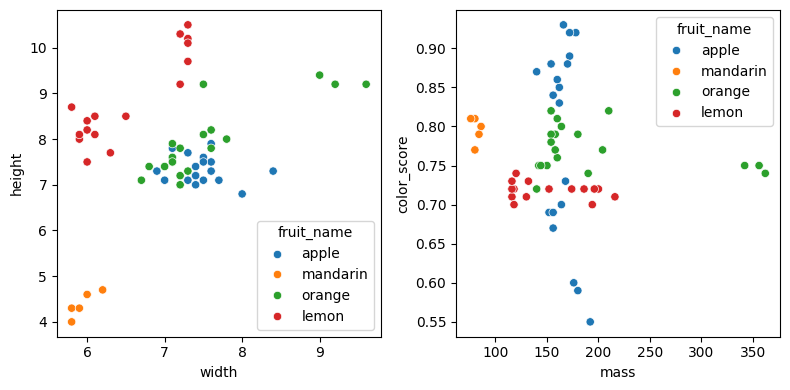

In [189]:
# 觀察相關性
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.scatterplot(data=fruit, x='width', y='height', hue='fruit_name', ax=axes[0])
sns.scatterplot(data=fruit, x='mass', y='color_score', hue='fruit_name', ax=axes[1])
plt.tight_layout()
plt.show()

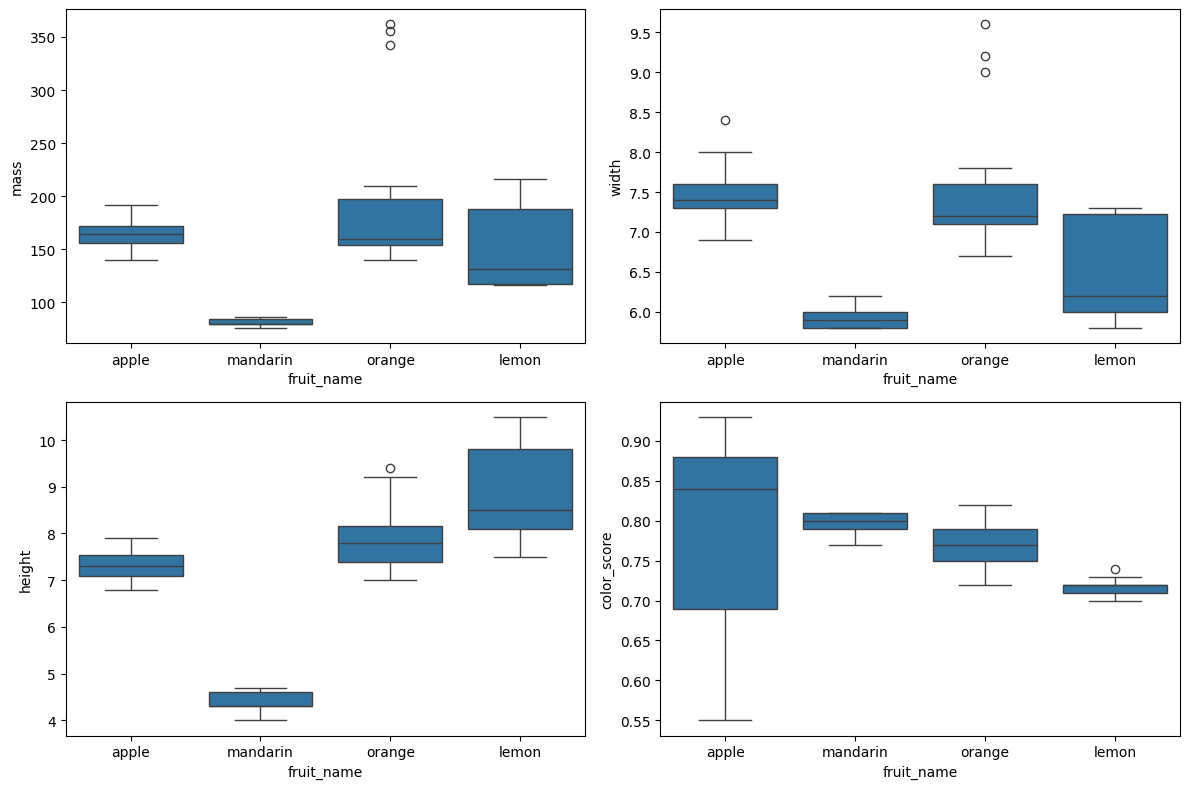

In [190]:
# 觀察分佈
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.boxplot(data=fruit, x='fruit_name', y='mass', ax=axes[0, 0])
sns.boxplot(data=fruit, x='fruit_name', y='width', ax=axes[0, 1])
sns.boxplot(data=fruit, x='fruit_name', y='height', ax=axes[1, 0])
sns.boxplot(data=fruit, x='fruit_name', y='color_score', ax=axes[1, 1])
plt.tight_layout()
plt.show()

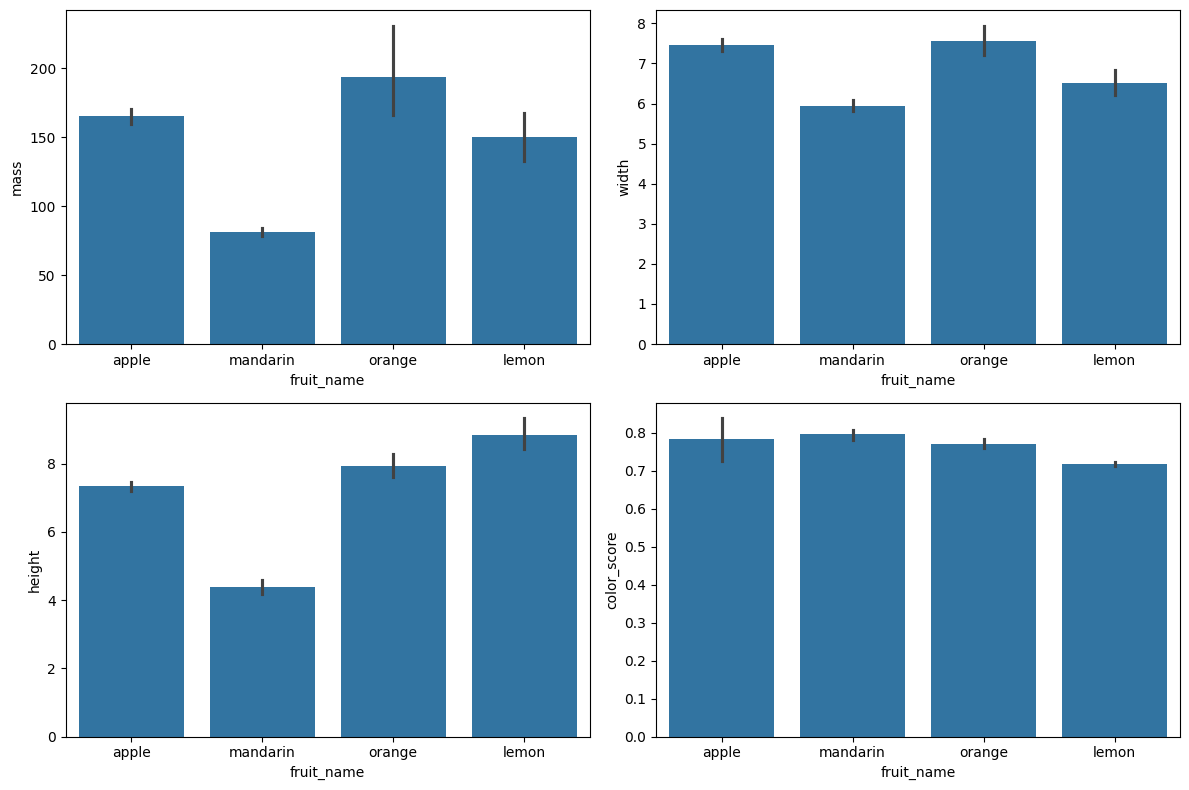

In [191]:
# 觀察數量
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.barplot(data=fruit, x='fruit_name', y='mass', ax=axes[0, 0])
sns.barplot(data=fruit, x='fruit_name', y='width', ax=axes[0, 1])
sns.barplot(data=fruit, x='fruit_name', y='height', ax=axes[1, 0])
sns.barplot(data=fruit, x='fruit_name', y='color_score', ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [192]:
# 選定特徵
x = fruit[['width', 'height']]
y = fruit['fruit_label']

In [193]:
# 切割資料集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

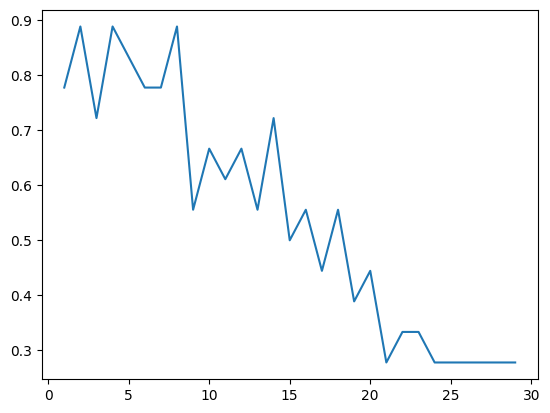

In [194]:
# 判斷n_neighbors的最佳數字
accuracy = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k, p=2) 
    knn.fit(x_train, y_train)                 
    y_pred = knn.predict(x_test)              
    accuracy.append(metrics.accuracy_score(y_test, y_pred)) 

k_range = range(1, 30)
plt.plot(k_range, accuracy)
plt.show()

In [195]:
# 建立模型
model = KNeighborsClassifier(n_neighbors=5, p=2)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [196]:
# 確認分數
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8536585365853658
0.8333333333333334


In [197]:
# 計算各項分數
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')

print('accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)


# 進行5折交叉驗證
scores = cross_val_score(model, x, y, cv=5)
print('Accuracy scores for each fold:', scores)
print('Average accuracy:', scores.mean())

accuracy: 0.8333333333333334
precision: 0.8629629629629628
recall: 0.8333333333333334
f1: 0.8370510662177328
Accuracy scores for each fold: [0.75       0.75       0.83333333 0.83333333 0.81818182]
Average accuracy: 0.7969696969696971
